# Bank's Deposit Prediction

# Problem Statement:-
"Bank's Deposit Prediction" est un projet de campagne marketing directe d'une banque. Les campagnes marketing des banques sont des actions planifiées pour faire connaître leurs produits et services financiers aux clients potentiels. Elles comprennent plusieurs activités comme la publicité, la vente, et la mise à disposition de produits pour les particuliers ou les entreprises.
L’objectif de "Bank's Deposit Prediction" vise à prédire si un client souscrira ou non aux dépôts à terme d'institution bancaire. Le dépôt à terme est essentiel dans le secteur financier car il permet d'optimiser les stratégies marketing et de renforcer l'engagement des clients en ciblant les clients potentiels.Nous analysons ici les données marketing d'une institution bancaire portugaise basées les enregistrements des appels téléphoniques de leur dernière campagne marketing. Ces derniers enregistrements sont disponibles sous la forme d’un ensemble de données.

# Project Objective :-
Notre but est de saisir les éléments déterminants dans les choix des clients de souscrire à des dépôts à terme et de mettre en place des modèles de prédiction capables d'anticiper ces résultats avec exactitude.

# Dataset :-
Les données sont liées aux campagnes de marketing direct d'une institution bancaire portugaise. L'ensemble de données utilisé dans ce projet provient de l'ensemble de données Bank Marketing créé par S. Moro, P. Rita et P. Cortez à l'Iscte - Institut universitaire de Lisbonne. Parmi les quatre ensembles de données disponibles, nous avons utilisé bank-full.csv qui contient 21 variables fournissant des informations sur 41188 clients.20 variables prédictives et y qui la variable cible. 
Pour plus d'informations sur l'ensemble de données utilisé, reportez-vous à https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Project Work flow :-

    .Installations et Mise à jour
    .Importation des librairies nécessaires
    .


### Import the necessary librairies

In [19]:
# Data manipulation libraries
import pandas as pd
import numpy as np
# For plotting (visualisation)
import matplotlib.pyplot as plt
import seaborn as sns
# To sample datasets
from sklearn.utils import resample

# Description des données  ### Reading Dataset and Basic Data Exploration

In [9]:
# Load the dataset
bank_df = pd.read_csv('C:\\Users\\Aboubacar\\OneDrive\Bureau\\Bank_Marketing\\bank_additional_full.csv', delimiter=';')
# Displays the dataset charactéristics
bank_df.info()
# To display all columns in the dataset.
pd.set_option('display.max_columns', None)
# Display the dimensions of the data.
bank_df.shape

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Aboubacar\AppData\Local\Temp\ipykernel_24548\2402595704.py:2: SyntaxWarning: invalid escape sequence '\B'
  bank_df = pd.read_csv('C:\\Users\\Aboubacar\\OneDrive\Bureau\\Bank_Marketing\\bank_additional_full.csv', delimiter=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(41188, 21)

In [10]:
# Display first 5 rows 
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Display the last 5 rows
bank_df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [8]:
# Display the randomly 5 rows
bank_df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38285,36,admin.,single,university.degree,no,no,no,cellular,oct,wed,146,1,999,1,failure,-3.4,92.431,-26.9,0.742,5017.5,no
21070,47,blue-collar,married,unknown,unknown,yes,no,cellular,aug,thu,227,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
28044,46,management,married,university.degree,no,no,no,cellular,apr,thu,249,1,999,0,nonexistent,-1.8,93.075,-47.1,1.483,5099.1,no
24463,42,admin.,married,university.degree,no,no,no,cellular,nov,mon,62,1,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8,no
26890,43,technician,married,professional.course,no,no,no,cellular,nov,thu,75,3,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no


Notre Dataset comprend 21 variables fournissant des informations sur 41188 clients. 20 variables prédictives et y; la variable cible. La mémoire utilisée par le DataFrame est de 6.6+ MB. Les différentes variables sont les suivantes : 

# Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

# Données clients de la banque :

1 - âge (numérique)

2 - emploi : type d'emploi (catégorique Nominal: "admin.", "col bleu", "entrepreneur", "femme de ménage", "gestion", "retraités", "indépendants", "services", "étudiant" ,"technicien","chômeur","inconnu")

3 - matrimonial : état civil (catégorique : "divorcé", "marié", "célibataire", "inconnu" ; note : "divorcé" signifie divorcé ou veuf)

4 - éducation (catégorique : "basic.4y", "basic.6y", "basic.9y", "lycée", "analphabètes", "cours.professionnel", "diplôme.universitaire", "inconnu")

5 - défaut : le crédit est-il en défaut ? (catégorique : "non", "oui", "inconnu")

6 – logement : a-t-il un prêt logement ? (catégorique : "non", "oui", "inconnu")

7 – prêt : a-t-il un prêt personnel ? (catégorique : "non", "oui", "inconnu")

# Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: "cellular","telephone") 

9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# Lié au dernier contact de la campagne en cours :

8 - contact : type de communication du contact (catégorique : "cellulaire", "téléphone")

9 - mois : mois du dernier contact de l'année (catégorique : "jan", "feb", "mar", ..., "nov", "dec")

10 - day_of_week : dernier jour de contact de la semaine (catégorique : "lu", "mar", "mer", "jeu", "ven")

11 - durée : durée du dernier contact, en secondes (numérique). Remarque importante : cet attribut affecte fortement la cible de sortie (par exemple, si durée=0 alors y="no"). Cependant, la durée n'est pas connue avant qu'un appel soit effectué. De plus, après la fin de l'appel, y est évidemment connu. Ainsi, cette donnée ne doit être incluse qu’à des fins de référence et doit être écartée si l’intention est d’avoir un modèle prédictif réaliste.

# Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

# Autres attributs :

12 - campagne : nombre de contacts effectués lors de cette campagne et pour ce client (numérique, inclut le dernier contact)

13 - pdays : nombre de jours écoulés après que le client a été contacté pour la dernière fois lors d'une campagne précédente (numérique ; 999 signifie que le client n'a pas été contacté auparavant)

14 - précédent : nombre de contacts effectués avant cette campagne et pour ce client (numérique)

15 - poutcome : résultat de la campagne marketing précédente (catégorique : "échec", "inexistant", "succès")

# Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)     

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)    

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

# Attributs du contexte social et économique

16 - emp.var.rate : taux de variation de l'emploi - indicateur trimestriel (numérique)

17 - cons.price.idx : indice des prix à la consommation - indicateur mensuel (numérique)

18 - cons.conf.idx : indice de confiance des consommateurs - indicateur mensuel (numérique)

19 - euribor3m : taux euribor 3 mois - indicateur journalier (numérique)

20 - nr.employed : nombre d'employés - indicateur trimestriel (numérique)

# Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Variable de sortie (cible souhaitée) :

21 - y - le client a-t-il souscrit un dépôt à terme ? (binaire : "oui", "non")


## VARIABLE CIBLE

Commençons par explorer la distribution cible.

<Axes: xlabel='y', ylabel='count'>

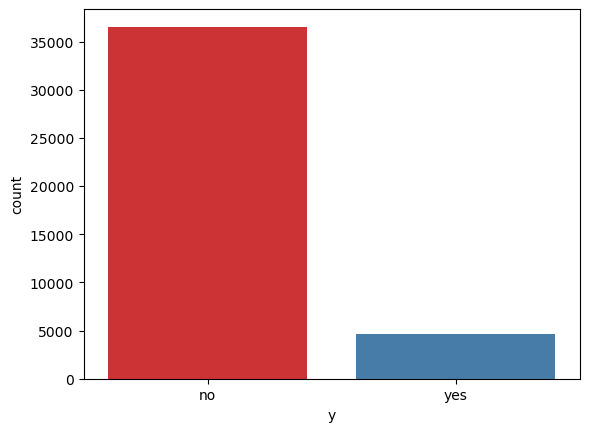

In [11]:
# Let' visualize the target distribution
sns.countplot(data=bank_df, x='y', palette='Set1')

Nous voyons que la variable cible est binaire catégorielle et que les données sont asymétriques. Nous utilisons la technique de sous-échantillonnage de la classe majoritaire pour améliorer cela.

In [20]:
# Make a copy of dataframe
d1=bank_df.copy()
# Separation of majority and minority classes
# Séparation des classes majoritaire et minoritaire
d2 = d1[d1.y=='yes']
d3= d1[d1.y=='no']

df_majority_downsampled = resample(d3, 
                                   replace=False,    # Échantillonnage sans remplacement
                                   n_samples=len(d2),  # Nombre d'échantillons égal à la classe minoritaire
                                   random_state=42)  # Reproductibilité
# Combinaison des échantillons minoritaires et sous-échantillonnés
da_bank = pd.concat([df_majority_downsampled, d3])
# Mélange des données pour éviter tout ordre biaisé
df_balanced = da_bank.sample(frac=1, random_state=42).reset_index(drop=True)

<Axes: xlabel='y', ylabel='count'>

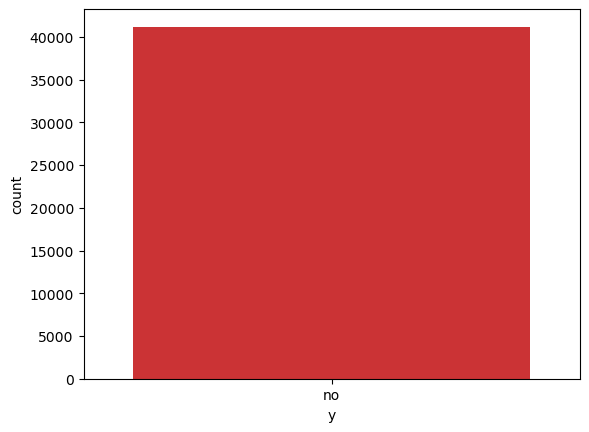

In [33]:
# Visualization of the new distribution
# Visualisation de la nouvelle distribution
sns.countplot(data=da_bank, x='y', palette='Set1')

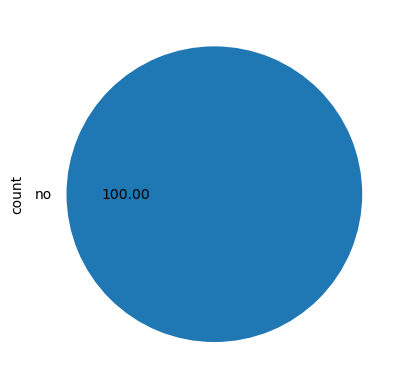

In [22]:
df_balanced['y'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

### Types de Variables

Identifions les variables catégorielles et numériques.

In [30]:
# Identifions les variables catégorielles
cat_vars = [var for var in bank_df.columns if bank_df[var].dtype == 'objet']
# Total des variables catégorielles
len(cat_vars)
# Cast all variables as categorical
bank_df[cat_vars] = bank_df[cat_vars].astype('category')

In [31]:
# Identifions les variables numériques
num_vars = bank_df.select_dtypes(include=['number']).columns
# Total des variables numériques
len(num_vars)

10

## Les Valeurs Manquantes

Découvrons quelles variables de l'ensemble de données contiennent des valeurs manquantes.

In [32]:
# Liste des variables contenant des valeurs manquantes
vars_with_na = [var for var in bank_df.columns if bank_df[var].isnull().sum() > 0]
# Déterminons le pourcentage de valeurs manquantes et affichONS le résultat classé par % de données manquantes
(bank_df.isnull().sum()/len(bank_df)*100).sort_values(ascending=False)

age               0.0
campaign          0.0
nr.employed       0.0
euribor3m         0.0
cons.conf.idx     0.0
cons.price.idx    0.0
emp.var.rate      0.0
poutcome          0.0
previous          0.0
pdays             0.0
duration          0.0
job               0.0
day_of_week       0.0
month             0.0
contact           0.0
loan              0.0
housing           0.0
default           0.0
education         0.0
marital           0.0
y                 0.0
dtype: float64

In [29]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 